In [2]:
import datetime,csv,time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
def update(str2):
    # str2 = 'Tue May 30 08:35:09 2017'
    dt = datetime.datetime.strptime(str2, '%a %b %d %H:%M:%S %Y')
    t = dt.strftime("%Y-%m-%d %H:%M:%S")
    return t

def get_week(days):
    xxx = datetime.datetime.fromtimestamp(time.mktime(time.strptime(days, "%Y-%m-%d"))).weekday() + 1
    return xxx

lists = []
with open('2141comments_xingxingUTF-8.csv','r',encoding='utf-8')as f:
    content = csv.reader(f)
    for con in content:
        if 'comment_time' not in con and '' not in con:
            times = str(update(con[3].replace('+0800 ','')))
            if '2017-03-01 00:00:00' <= times <= '2017-08-31 23:59:59':
                con[3] = times
                lists.append(con)

{3: 318, 4: 385, 5: 288, 6: 266, 7: 225, 8: 237}


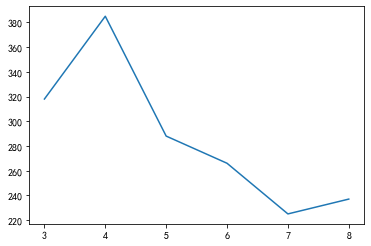

In [3]:
#月
month_dicts = {}
for i in lists:
    month = int(i[3].split('-')[1])
    if month not in month_dicts:
        month_dicts[month] = 0
    month_dicts[month] = month_dicts[month] + 1
month_lists = sorted(month_dicts.items(),key=lambda x:x[0],reverse=False)
month_dicts.clear()
for mlists in month_lists:
    month_dicts[mlists[0]] = mlists[1]
print(month_dicts)
plt.plot(list(month_dicts.keys()), list(month_dicts.values()))
# 展现画布
plt.show()

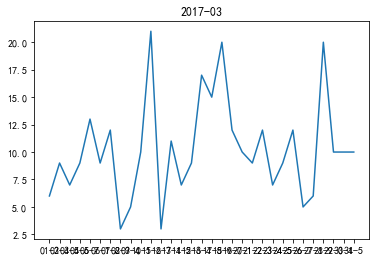

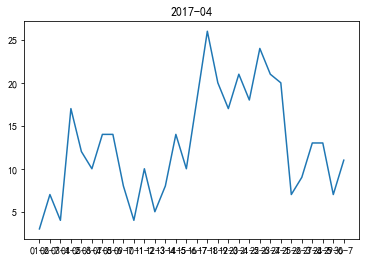

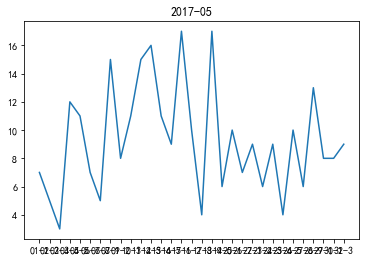

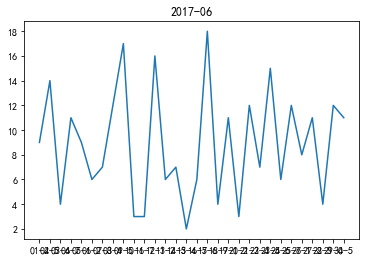

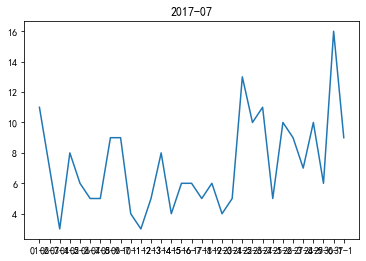

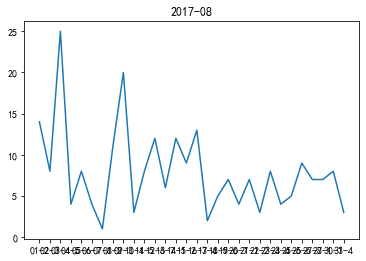

In [4]:
#日
day_dicts = {}
for i in lists:
    days = i[3].split(' ')[0].split('-')
    if days[0] + '-' + days[1] not in day_dicts:
        day_dicts[days[0] + '-' + days[1]] = {}
    if days[0] + '-' + days[1] + '-' + days[2] not in day_dicts[days[0] + '-' + days[1]]:
        day_dicts[days[0] + '-' + days[1]][days[0] + '-' + days[1] + '-' + days[2]] = 0
    day_dicts[days[0] + '-' + days[1]][days[0] + '-' + days[1] + '-' + days[2]] += 1
day_lists = sorted(day_dicts.items(),key=lambda x:x[0],reverse=False)
for day_tuple in day_lists:
    month_day_dicts = {}
    new_day_tuple = sorted(day_tuple[1].items(), key=lambda x: x[0], reverse=False)
    for dlists in new_day_tuple:
        xxx = get_week(dlists[0])
        month_day_dicts[dlists[0] + ' ' + str(xxx)] = dlists[1]
    daylists = []
    for d in list(month_day_dicts.keys()):
        daylists.append('-'.join(d.split('-')[-1].split(' ')))
    plt.title(day_tuple[0])
    plt.plot(daylists, list(month_day_dicts.values()))
    # 展现画布
    plt.show()
    
#日
# day_dicts = {}
# for i in lists:
#     days = int(i[3].split(' ')[0].split('-')[-1])
#     if days not in day_dicts:
#         day_dicts[days] = 0
#     day_dicts[days] = day_dicts[days] + 1
#
# day_lists = sorted(day_dicts.items(),key=lambda x:x[0],reverse=False)
# day_dicts.clear()
# for dlists in day_lists:
#     day_dicts[dlists[0]] = dlists[1]
# print(day_dicts)
# plt.plot(list(day_dicts.keys()), list(day_dicts.values()))
# # 展现画布
# plt.show()

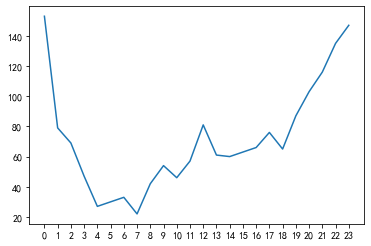

In [5]:
#时
hour_dicts = {}
for i in lists:
    hour = int(i[3].split(' ')[-1].split(':')[0])
    if hour not in hour_dicts:
        hour_dicts[hour] = 0
    hour_dicts[hour] = hour_dicts[hour] + 1
hour_lists = sorted(hour_dicts.items(),key=lambda x:x[0],reverse=False)
hour_dicts.clear()
for hlists in hour_lists:
    hour_dicts[hlists[0]] = hlists[1]
n_hour_lists = []
for k in list(hour_dicts.keys()):
    n_hour_lists.append(str(k))
plt.plot(n_hour_lists, list(hour_dicts.values()))
# 展现画布
plt.show()